# **Modelling, Simulation & Optimization - CA1 Project**
### OLUWATOBI EKUNDAYO - x19173105

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
  <li><span><a href="#Part-1:-Simulation---HS2-Train-Line" data-toc-modified-id="Part-1:-Simulation---HS2-Train-Line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1: Simulation - HS2 Train Line</a></span></li>
  <li><span><a href="#Load-Libraries" data-toc-modified-id="Import-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Libraries</a></span></li>
  <li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare Data</a></span></li>
      <ul>
      <li><span><a href="#Setup-Train-and-Track-Data" data-toc-modified-id="Setup-Train-and-Track-Data-1"><span class="toc-item-num"></span>Setup Train and Track Data</a></span></li>
      <li><span><a href="#Simulation-Results-Data" data-toc-modified-id="Simulation-Results-Data-2"><span class="toc-item-num"></span>Simulation Results Data</a></span></li>
      <li><span><a href="#Time-Format" data-toc-modified-id="Time-Format-3"><span class="toc-item-num"></span>Time Format</a></span></li>
      </ul>
  <li><span><a href="#Entity-and-Process-Definition" data-toc-modified-id="Entity-and-Process-Definition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Entity and Process Definition</a></span></li>
      <ul>
      <li><span><a href="#Train-Process" data-toc-modified-id="Train-Process-1"><span class="toc-item-num"></span>Train Process</a></span></li>
      <li><span><a href="#Train-Stations" data-toc-modified-id="Train-Stations-2"><span class="toc-item-num"></span>Train Stations</a></span></li>
      <li><span><a href="#Signalling-Blocks" data-toc-modified-id="Signalling-Blocks-3"><span class="toc-item-num"></span>Signalling Blocks</a></span></li>
      <li><span><a href="#Train-Timing---Central" data-toc-modified-id="Train-Timing---Central-4"><span class="toc-item-num"></span>Train Timing - Central</a></span></li>
      <li><span><a href="#Train-Simulation-Process" data-toc-modified-id="Train-Simulation-Process-5"><span class="toc-item-num"></span>Train Simulation Process</a></span></li>
      </ul>  
  <li><span><a href="#Simulation-Tests" data-toc-modified-id="Simulation-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simulation Tests</a></span></li>
      <ul>
      <li><span><a href="#Distribution-of-Travel-Time" data-toc-modified-id="Distribution-of-Travel-Time-1"><span class="toc-item-num"></span>Distribution of Travel Time</a></span></li> 
      <li><span><a href="#Distribution-of-Delay-Time" data-toc-modified-id="Distribution-of-Delay-Time-2"><span class="toc-item-num"></span>Distribution of Delay Time</a></span></li> 
      <li><span><a href="#Test-1:-Varying-the-number-of-trains-(Travel-Time)" data-toc-modified-id="Test-1:-Varying-the-number-of-trains-(Travel-Time)-3"><span class="toc-item-num"></span>Test 1: Varying the number of trains (Travel Time)</a></span></li>
      <li><span><a href="#Test-2:-Varying-the-number-of-signalling-blocks-(Travel-Time)" data-toc-modified-id="Test-2:-Varying-the-number-of-signalling-blocks-(Travel-Time)-4"><span class="toc-item-num"></span>Test 2: Varying the number of signalling blocks (Travel Time)</a></span></li>
      <li><span><a href="#Test-3:-Varying-the-number-of-trains-(Delay-Time)" data-toc-modified-id="Test-3:-Varying-the-number-of-trains-(Delay-Time)-5"><span class="toc-item-num"></span>Test 3: Varying the number of trains (Delay Time)</a></span></li>
      <li><span><a href="#Test-4:-Varying-the-number-of-signalling-blocks-(Delay-Time)" data-toc-modified-id="Test-4:-Varying-the-number-of-signalling-blocks-(Delay-Time)-6"><span class="toc-item-num"></span>Test 4: Varying the number of signalling blocks (Delay Time)</a></span></li>
      </ul>
  <li><span><a href="#Part-2:-Optimisation" data-toc-modified-id="Part-2:-Optimisation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Part 2: Optimisation</a></span></li>
      <ul> 
      <li><span><a href="#Exhaustive-Search" data-toc-modified-id="Exhaustive-Search-1"><span class="toc-item-num"></span>Exhaustive Search</a></span></li>
      <li><span><a href="#Monte-Carlo-Method" data-toc-modified-id="Monte-Carlo-Method-2"><span class="toc-item-num"></span>Monte Carlo Method</a></span></li>
      </ul>
  <li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li>
 </ul></div>

## **Part 1: Simulation - HS2 Train Line**

This project models, simulates and optimizes a train line with stations and signalling blocks. 

It is modelled as a single queue single server system where the signalling blocks are the servers while the trains are on a queue and get served one at a time by a signalling block. The event graph diagram is shown below.

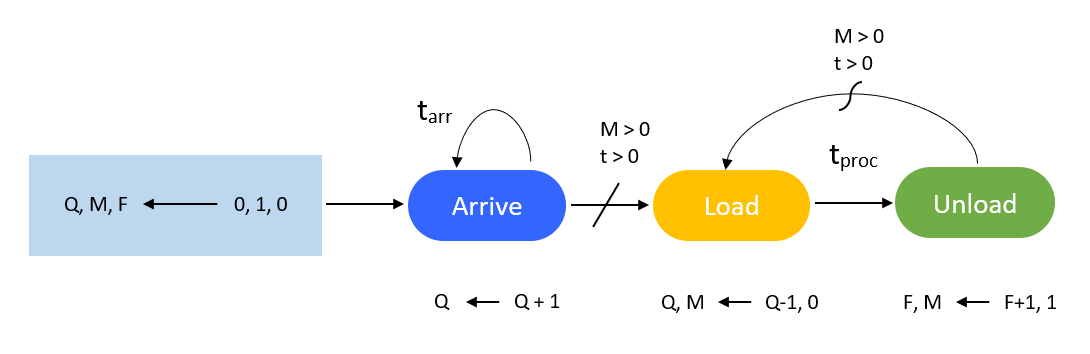

## **Load Libraries**

In [ ]:
#Install the simpy package
!pip install simpy

In [ ]:
import pandas as pd
import numpy as np
import math
import random
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import simpy
import simpy.events as evt

from numpy import random
#import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Prepare Data**

### **Setup HS2 Train Line Data**

In [ ]:
From = ['London Old Oak Common']
To = ['Birmingham Interchange']
Travel_Time  = [1684]
numblocks = [12]
Line = ['HS2']

line_data = pd.DataFrame({'Line':Line,'From':From,'To':To,'Travel_Time':Travel_Time,
                          'Blocks':numblocks})

line_data

,Line,From,To,Travel_Time,Blocks
0,HS2,London Old Oak Common,Birmingham Interchange,1684,12


### **Simulation Results Data**

A **gen_simdata** function is defined to generate a dataframe to collect simulation data. This function accepts argument **n** which is the number of trains in the simulation run.

In [ ]:
def gen_simdata(n):
    
    simul_data = pd.DataFrame({'departure_time':[None]*n, 'arrival_time':[None]*n,'Train':[None]*n})
    
    return simul_data

In [ ]:
simul_data = gen_simdata(6)
simul_data

,departure_time,arrival_time,Train
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None


### **Time Format**

Functions to return time in prescribed time format

In [ ]:
def get_daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
        
def get_now():
    return get_daytime(envir.now)

## **Entity and Process Definition**

### **Train Process**

A **TrainLine** class is created to hold information about the trains and its processes. A constructor method **(__init__)** is created in which the variables for the instances are declared.

In [ ]:
class TrainLine(object):
    
    def __init__(self,i,j,n,route,lineBlocks):
        self.route = route
        self.p = 0
        self.hour = j
        self.n = n
        self.train_num = i + (self.hour * self.n)
        self.name = '[Train '+f"{self.train_num:2d}"+']'
        self.lineBlocks = lineBlocks
        simul_data.at[self.train_num,'Train'] = self.name
        
    def processor(self):

        # Check for 9am Train from London to Birmingham
        if envir.now >= 32400 and envir.now <= 32431:
          qq = 1
        else: qq = 0
        #Train drives from depot to starting location
        print(f"{get_now():s} {self.name:s} drives from depot to starting station")

        yield envir.timeout(30)
        here = self.route[0]  
        simul_data.at[self.train_num, 'departure_time'] = envir.now
        
        for Tstop in self.route[1:]:  
          
          #Fetch data from dataset
          loadline = line_data[line_data['From'] == here]
          
          #random generator for distribution
          x_distrib = np.random.lognormal(mean=3.378, sigma=0.751, size=None)
          drivetime = loadline.iloc[0].at['Travel_Time'] + x_distrib
          blockNum = loadline.iloc[0].at['Blocks']
          blockDrive = drivetime/blockNum
          
          #Train departs from station
          print(f"{get_now():s} {self.name:s} is waiting to depart from {here:s} for {Tstop:s}")

          for Tline in range(len(self.lineBlocks[here])):
                            
            #Train requests for signalling block
            print(f"{get_now():s} {self.name:s} requests block {Tline} for trip to {Tstop:s}")
            
            with self.lineBlocks[here][Tline].request() as req:
              yield req
              
              # Turn the signal to red as soon as Train enters block
              print(f"{get_now():s} {self.name:s} enters block {Tline} for trip to {Tstop:s}")
  
              #Train driving
              yield envir.timeout(blockDrive)
              
              #Induce 30 minutes delay for fixing temporary breakdown for 9am Train
              if qq == 1:
                print(f"{get_now():s} {self.name:s} Sorry! There is a 30-minute delay due to a temporary breakdown of the 9am Train")
                yield envir.timeout(1800)
                qq=0

              #Train arrives at station
              if Tline == len(self.lineBlocks[here])-1:
                print(f"{get_now():s} {self.name:s} arrives at {Tstop:s}")
                here = Tstop
                
                #Train reaches final station
                if here == self.route[-1]:
                  print(f"{get_now():s} {self.name:s} has reached its final destination")
                  #record the simulation data
                  simul_data.at[self.train_num, 'arrival_time'] = envir.now
          


**Train Process Flow**

The train process is defined in the **processor** method above.

* The train drives from depot to station (London Old Oak), waits to depart, requests for the signalling block. 

* If the signalling block is **empty**, then and only then can the train drive into the track (k), else the train waits till the signalling block is empty before it can proceed.

* The train continues its journey by entering into each block. When the train gets to the final station (Birmingham Interchange), it notifies that the train has reached the final destination.

* The train name, time of departure and time of arrival for each train are all recorded in a table (dataframe).

**Assumptions**

* The trains travel at the same speed. This way the signally blocks can be tested effectively without variation in train speed.

* The signalling blocks have all equal length.

* There is a train depot and 2 stations (*London Old Oak and Birmingham Interchange*). 

* It takes 30 seconds for each train to drive from the **depot** to the first station **London Old Oak**. 

* The current location is set as the variable **here**.


### **Train Stations**

A class **Station** is created to get the train station for London Old Oak Commons and the train station for Birmingham Interchange

In [ ]:
class Train_Station(object):
    def __init__(self):
        pass
            
    def get_train_station():
        
        station_data=line_data['From'].to_list()
        station_data+=[line_data['To'].to_list()[-1]]
        
        return station_data

### **Signalling Blocks**

A **SigBlocks** class is created to handle creation of the signalling blocks for each stretch of the journey. 

The **generate** function takes the argument **station** and generates the number of signalling blocks to the next station., after which it returns the number as **sig_blocks**

In [ ]:
class SigBlocks(object):
    
    def __init__(self):
        pass
    
    def generate(station):
        sig_blocks = []
        loadline = line_data[line_data['From'] == station]
        numBlocks = loadline.iloc[0].at['Blocks']
        
        for pcs in range(numBlocks):
            blk = simpy.Resource(envir, capacity=1)
            sig_blocks.append(blk)
        
        return sig_blocks  

### **Train Timing - Central**

A function **central** is created to handle the release of the trains and the start and stop times. This function takes the arguments:

* **n**: Number of trains for the simulation

* **lineBlocks**: A dictionary containing stations and the signalling blocks to the next station

* **start**: Time to start the simulation.

The time between release of each train is saved in the variable **dtiming** and the simulation is started at 7:00:00.

In [ ]:
def central(n,lineBlocks,start=7*3600):
    
    #timing depending on number of trains
    dtiming = round(3600/n,2)
        
    #start the simulation by 07:00:00    
    yield envir.timeout(start-envir.now)
    
    #get all stations on the HS2 line
    station_data = Train_Station.get_train_station()

    #Train schedule from 07:00:00 to 10:00:00 
    for j in range(0,15):
      for i in range(n):
        trl = TrainLine(i,j,n,station_data,lineBlocks)
        envir.process(trl.processor())
        yield envir.timeout(dtiming)

### **Train Simulation Process**

A function **simulate_trainline** is created to wrap the whole simulation process. The function takes arguments:
* **n** = Number of trains per hour
* **k** = Number of signalling blocks for the stretch between London Old Oak and Birmingham Interchange

The **simul_data and envir** variables are set as global variables, so that they can be accessible to all methods and classes throughout the simulation. The number of signalling blocks **k** has already been set in the **prepared data** section. The stations on the line are gotten using the defined **get_train_station** function under the **Train_Station** class.

The signalling blocks for the entire trip are created using the **generate** function from the **SigBlocks** class. These blocks are stored in the dictionary **lineBlocks** and passed into the **central** function. **simul_data** variables are used with a dataframe for recording the simulation results respectively.

In [ ]:
def simulate_trainline(n,k):
    
    global simul_data
    global envir
    
    line_data.iloc[0,4] = k
    
    envir = simpy.Environment()
    
    #get the stations on the HS2 line
    station_data = Train_Station.get_train_station()
    station_data = station_data[:-1]
    
    #Generate the signalling blocks based on k number of signalling blocks in the data
    lineBlocks = {}
    for depot in station_data:
        blocks = SigBlocks.generate(depot)
        lineBlocks[depot]=blocks

    simul_data = gen_simdata(15*n)
    
    #run simulation
    envir.process(central(n,lineBlocks))
    envir.run()

    return simul_data

A function **processTravel** is defined and used for processing the results recorded from the simulation and output the average travel time as **averageTravelTime**.

In [ ]:
def processTravel(simul_data):
    
    #Access results
    simul_data['Travel_Time'] = simul_data['arrival_time'] - simul_data['departure_time']
    averageTravelTime = round(np.mean(simul_data['Travel_Time']),2)
    
    return averageTravelTime

In [ ]:
def processDelay(simul_data):
    
    #Access results
    simul_data['Travel_Time'] = simul_data['arrival_time'] - simul_data['departure_time']
    simul_data['Delay'] = simul_data['Travel_Time'].apply(lambda x: round(x) - 1684)
    averageDelayTime = round(np.mean(simul_data['Delay']),2)
    
    return averageDelayTime

## **Simulation Tests**

In [ ]:
simulate_trainline(11,14)

Streaming output truncated to the last 5000 lines.
07:59:19 [Train  7] enters block 10 for trip to Birmingham Interchange
07:59:51 [Train  9] requests block 5 for trip to Birmingham Interchange
07:59:51 [Train  9] enters block 5 for trip to Birmingham Interchange
07:59:59 [Train 11] drives from depot to starting station
08:00:29 [Train 11] is waiting to depart from London Old Oak Common for Birmingham Interchange
08:00:29 [Train 11] requests block 0 for trip to Birmingham Interchange
08:00:29 [Train 11] enters block 0 for trip to Birmingham Interchange
08:00:51 [Train  6] requests block 13 for trip to Birmingham Interchange
08:00:51 [Train  6] enters block 13 for trip to Birmingham Interchange
08:01:00 [Train  8] requests block 8 for trip to Birmingham Interchange
08:01:00 [Train  8] enters block 8 for trip to Birmingham Interchange
08:01:14 [Train 10] requests block 3 for trip to Birmingham Interchange
08:01:14 [Train 10] enters block 3 for trip to Birmingham Interchange
08:01:22 [Tra

,departure_time,arrival_time,Train
0,25230,26948.1,[Train 0]
1,25557.3,27260,[Train 1]
2,25884.5,27580.4,[Train 2]
3,26211.8,27906.2,[Train 3]
4,26539.1,28279.5,[Train 4]
...,...,...,...
160,77593.2,79356.6,[Train 160]
161,77920.5,79711.2,[Train 161]
162,78247.7,79949.1,[Train 162]
163,78575,80271.6,[Train 163]


In [ ]:
simul_data.to_csv (r'C:\mso_simuation_11_14.csv', index = False, header=True)

#### **Distribution of Travel Time**

In [ ]:
travelTime = processTravel(simul_data)
print(f"Average travel time was: {travelTime}")

Average travel time was: 1719.94


In [ ]:
simul_data['Travel_Time'] = simul_data['arrival_time'] - simul_data['departure_time']
distrib_TravelTime = simul_data['Travel_Time']

In [ ]:
simul_data['Travel_Time']

0       1718.1
1      1702.77
2      1695.86
3      1694.43
4      1740.41
        ...   
160    1763.44
161    1790.74
162    1701.33
163    1696.56
164    1691.02
Name: Travel_Time, Length: 165, dtype: object

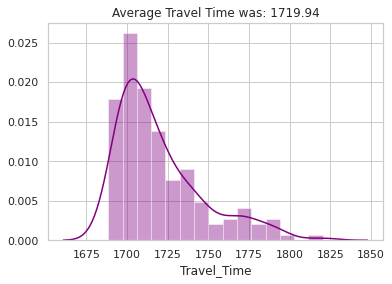

In [ ]:
x=distrib_TravelTime
sns.set(style="whitegrid")
sns.distplot(x, bins=15, kde=True, color="purple")
plt.title(f"Average Travel Time was: {travelTime}")
plt.show()
#sns.kdeplot(x, shade=True, cut = 0, color="purple")

#### **Distribution of Delay Time**

In [ ]:
delayTime = processDelay(simul_data)
print(f"Average Delay time was: {delayTime}")

Average Delay time was: 35.95


In [ ]:
simul_data['Travel_Time'] = simul_data['arrival_time'] - simul_data['departure_time']
simul_data['Delay'] = simul_data['Travel_Time'].apply(lambda x: round(x) - 1684)
distrib_DelayTime = round((simul_data['Delay']),2)

In [ ]:
(simul_data['Delay'])

0       34.0
1       19.0
2       12.0
3       10.0
4       56.0
       ...  
160     79.0
161    107.0
162     17.0
163     13.0
164      7.0
Name: Delay, Length: 165, dtype: float64

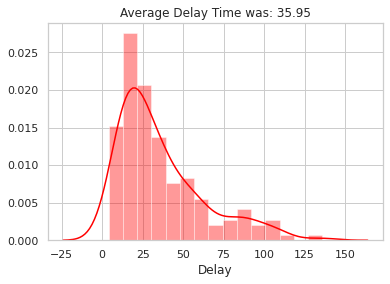

In [ ]:
x=distrib_DelayTime
sns.set(style="whitegrid")
sns.distplot(x, bins=15, kde=True, color="red")
plt.title(f"Average Delay Time was: {delayTime}")
plt.show()
#sns.kdeplot(x, shade=True, cut = 0, color="purple")

#### **Test 1: Varying the number of trains (Travel Time)**

Run a simulation to vary the **number of trains** between London Old Oak Common and Birmingham Interchange for a **range of 1 to 24 within an hour** while the **signalling blocks kept constant at 12**. Results are recorded for exploratory analysis.

In [ ]:
test_n = []
for i in range(1,25):
    store_n = simulate_trainline(i,12)
    dst_n = processTravel(store_n)
    test_n.append(dst_n)

Streaming output truncated to the last 5000 lines.
15:00:58 [Train 181] requests block 5 for trip to Birmingham Interchange
15:00:58 [Train 182] enters block 4 for trip to Birmingham Interchange
15:01:14 [Train 180] requests block 6 for trip to Birmingham Interchange
15:01:14 [Train 181] enters block 5 for trip to Birmingham Interchange
15:01:29 [Train 179] requests block 7 for trip to Birmingham Interchange
15:01:29 [Train 180] enters block 6 for trip to Birmingham Interchange
15:01:43 [Train 178] requests block 8 for trip to Birmingham Interchange
15:01:43 [Train 179] enters block 7 for trip to Birmingham Interchange
15:01:57 [Train 177] requests block 9 for trip to Birmingham Interchange
15:01:57 [Train 178] enters block 8 for trip to Birmingham Interchange
15:02:12 [Train 176] requests block 10 for trip to Birmingham Interchange
15:02:12 [Train 177] enters block 9 for trip to Birmingham Interchange
15:02:25 [Train 175] requests block 11 for trip to Birmingham Interchange
15:02:25 [

In [ ]:
test_n

[1850.47,
 1792.16,
 1782.11,
 1773.7,
 1776.25,
 1774.75,
 1770.46,
 1779.35,
 1772.58,
 1776.99,
 1724.47,
 1784.45,
 1723.08,
 1727.11,
 1804.82,
 1811.49,
 1728.76,
 1842.86,
 1726.1,
 1896.52,
 1937.11,
 1999.29,
 1753.07,
 2521.13]

In [ ]:
range_n = pd.DataFrame({'Time': test_n})
range_n

,Time
0,1850.47
1,1792.16
2,1782.11
3,1773.70
4,1776.25
5,1774.75
6,1770.46
7,1779.35
8,1772.58
9,1776.99


**Visualization**

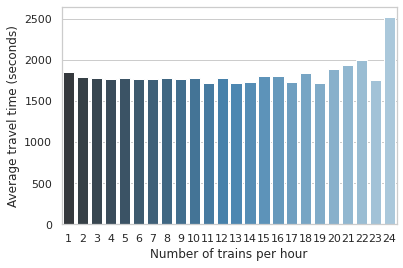

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=[x for x in range(1,25)], y=range_n['Time'], palette="Blues_d")
plt.xlabel('Number of trains per hour')
plt.ylabel('Average travel time (seconds)')
#plt.ylim(2000, 110000)
plt.show()

The results obtained from varying the number of trains (n), shows that at **12 signalling blocks**, lesser average travel time is achieved with with the following **number of trains per hour (n = 11, 13, 14, 17, 19 and 23)**. Due to the restricted entry of one train at a time for each signalling blocks, there would be more number of trains waiting in line with an increase in the number of trains per hour for limited number of signalling blocks.

#### **Test 2: Varying the number of signalling blocks (Travel Time)**

Run a simulation to vary the **number of signalling block** between London Old Oak Common and Birmingham Interchange for a **range of 1 to 15 within an hour** while the **number of trains kept constant at 30**. Results are recorded for exploratory analysis.

In [ ]:
test_k = []
for i in range(1,16):
    store_k = simulate_trainline(30,i)
    dst_k = processTravel(store_k)
    test_k.append((dst_k))

Streaming output truncated to the last 5000 lines.
17:29:17 [Train 310] enters block 0 for trip to Birmingham Interchange
17:29:25 [Train 300] requests block 9 for trip to Birmingham Interchange
17:29:25 [Train 301] enters block 8 for trip to Birmingham Interchange
17:29:33 [Train 308] requests block 2 for trip to Birmingham Interchange
17:29:33 [Train 309] enters block 1 for trip to Birmingham Interchange
17:29:42 [Train 299] requests block 10 for trip to Birmingham Interchange
17:29:42 [Train 300] enters block 9 for trip to Birmingham Interchange
17:29:48 [Train 307] requests block 3 for trip to Birmingham Interchange
17:29:48 [Train 308] enters block 2 for trip to Birmingham Interchange
17:29:58 [Train 298] requests block 11 for trip to Birmingham Interchange
17:29:58 [Train 299] enters block 10 for trip to Birmingham Interchange
17:30:00 [Train 315] drives from depot to starting station
17:30:05 [Train 306] requests block 4 for trip to Birmingham Interchange
17:30:05 [Train 307] en

In [ ]:
test_k

[363022.77,
 169703.8,
 105628.98,
 73245.43,
 53835.43,
 40990.21,
 31690.39,
 24798.65,
 19386.0,
 15270.31,
 11729.45,
 8750.81,
 6250.39,
 4084.31,
 2589.36]

In [ ]:
range_k = pd.DataFrame({'Time':test_k})
range_k

,Time
0,363022.77
1,169703.80
2,105628.98
3,73245.43
4,53835.43
5,40990.21
6,31690.39
7,24798.65
8,19386.00
9,15270.31


**Visualization**

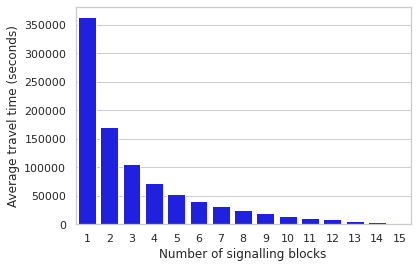

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=[x for x in range(1,16)], y=range_k['Time'], color='blue')
plt.xlabel('Number of signalling blocks')
plt.ylabel('Average travel time (seconds)')
#plt.ylim(1000, 10000)
plt.show()

The results obtained from varying the number of signalling blocks (k) shows that at 30 trains per hour, **the higher the number of signalling blocks, the lesser the average travel time**.

### **Test 3: Varying the number of trains (Delay Time)**

Run a simulation to vary the **number of trains** between London Old Oak Common and Birmingham Interchange for a **range of 1 to 24 within an hour** while the **signalling blocks kept constant at 12**. Results are recorded for exploratory analysis.

In [ ]:
testdelay_n = []
for i in range(1,25):
    storedelay_n = simulate_trainline(i,12)
    dstdelay_n = processDelay(storedelay_n)
    testdelay_n.append(dstdelay_n)

Streaming output truncated to the last 5000 lines.
15:01:56 [Train 181] requests block 5 for trip to Birmingham Interchange
15:01:56 [Train 182] enters block 4 for trip to Birmingham Interchange
15:02:08 [Train 180] requests block 6 for trip to Birmingham Interchange
15:02:08 [Train 181] enters block 5 for trip to Birmingham Interchange
15:02:20 [Train 179] requests block 7 for trip to Birmingham Interchange
15:02:20 [Train 180] enters block 6 for trip to Birmingham Interchange
15:02:30 [Train 193] drives from depot to starting station
15:02:33 [Train 178] requests block 8 for trip to Birmingham Interchange
15:02:33 [Train 179] enters block 7 for trip to Birmingham Interchange
15:02:43 [Train 177] requests block 9 for trip to Birmingham Interchange
15:02:43 [Train 178] enters block 8 for trip to Birmingham Interchange
15:02:56 [Train 176] requests block 10 for trip to Birmingham Interchange
15:02:56 [Train 177] enters block 9 for trip to Birmingham Interchange
15:03:00 [Train 193] is w

In [ ]:
testdelay_n

[174.4,
 101.77,
 93.29,
 92.68,
 83.04,
 87.34,
 89.35,
 96.02,
 94.44,
 95.57,
 38.4,
 104.32,
 40.93,
 43.95,
 130.63,
 129.35,
 43.35,
 158.86,
 49.81,
 223.46,
 282.34,
 343.18,
 57.42,
 914.04]

In [ ]:
rangedelay_n = pd.DataFrame({'Time': testdelay_n})
rangedelay_n

,Time
0,174.40
1,101.77
2,93.29
3,92.68
4,83.04
5,87.34
6,89.35
7,96.02
8,94.44
9,95.57


**Visualization**

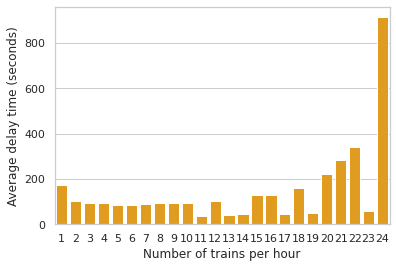

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=[x for x in range(1,25)], y=rangedelay_n['Time'], color='orange')
plt.xlabel('Number of trains per hour')
plt.ylabel('Average delay time (seconds)')
#plt.ylim(2000, 110000)
plt.show()

The results obtained from varying the number of trains (n), shows that at **12 signalling blocks**, lesser average delay time is achieved with with the following **number of trains per hour (n = 11, 13, 14, 17, 19 and 23)**. Due to the restricted entry of one train at a time for each signalling blocks, there would be more number of trains waiting in line with an increase in the number of trains per hour for limited number of signalling blocks.

### **Test 4: Varying the number of signalling blocks (Delay Time)**

Run a simulation to vary the **number of signalling block** between London Old Oak Common and Birmingham Interchange for a **range of 1 to 15 within an hour** while the **number of trains kept constant at 30**. Results are recorded for exploratory analysis.

In [ ]:
testdelay_k = []
for i in range(1,16):
    storedelay_k = simulate_trainline(30,i)
    dstdelay_k = processDelay(storedelay_k)
    testdelay_k.append((dstdelay_k))

Streaming output truncated to the last 5000 lines.
17:28:31 [Train 301] enters block 8 for trip to Birmingham Interchange
17:28:35 [Train 309] requests block 1 for trip to Birmingham Interchange
17:28:35 [Train 310] enters block 0 for trip to Birmingham Interchange
17:28:44 [Train 299] requests block 10 for trip to Birmingham Interchange
17:28:44 [Train 300] enters block 9 for trip to Birmingham Interchange
17:28:49 [Train 308] requests block 2 for trip to Birmingham Interchange
17:28:49 [Train 309] enters block 1 for trip to Birmingham Interchange
17:28:59 [Train 298] requests block 11 for trip to Birmingham Interchange
17:28:59 [Train 299] enters block 10 for trip to Birmingham Interchange
17:29:02 [Train 307] requests block 3 for trip to Birmingham Interchange
17:29:02 [Train 308] enters block 2 for trip to Birmingham Interchange
17:29:10 [Train 297] requests block 12 for trip to Birmingham Interchange
17:29:10 [Train 298] enters block 11 for trip to Birmingham Interchange
17:29:17 

In [ ]:
testdelay_k

[360951.39,
 168410.4,
 103667.98,
 71432.52,
 52243.38,
 39258.54,
 30079.39,
 23281.1,
 17891.49,
 13366.09,
 9922.25,
 7061.56,
 4592.05,
 2515.76,
 879.6]

In [ ]:
rangedelay_k = pd.DataFrame({'Time': testdelay_k})
rangedelay_k

,Time
0,360951.39
1,168410.40
2,103667.98
3,71432.52
4,52243.38
5,39258.54
6,30079.39
7,23281.10
8,17891.49
9,13366.09


**Visualization**

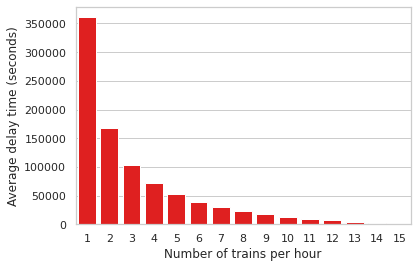

In [ ]:
sns.set(style="whitegrid")
sns.barplot(x=[x for x in range(1,16)], y=rangedelay_k['Time'], color='red')
plt.xlabel('Number of trains per hour')
plt.ylabel('Average delay time (seconds)')
#plt.ylim(2000, 110000)
plt.show()

The results obtained from varying the number of signalling blocks (k), shows that at 30 trains per hour, **the higher the number of signalling blocks, the lesser the average delay time**.

## **Part 2: Optimisation**

### **Exhaustive Search**

The **Exhaustive Search or Brute-Force Search Algorithm** is a very general problem-solving technique and algorithmic paradigm that consists of systematically enumerating all possible candidates for the solution and checking whether each candidate satisfies the problem's statement.

This algorithm is applied to obtain the optimum number of trains and optimum number of signalling blocks to minimise overall travel time. This will be carried out using **(n ∈ {1, ..., 24} and k ∈ {1, ..., 16})**.

In [ ]:
train_n = [i for i in range(1,25)]
sigblk_k = [x for x in range(1,17)]

bf_search = []

for i in train_n:
    for j in sigblk_k:
        bf_sim = simulate_trainline(i,j)
        dtime = processDelay(bf_sim)
        #Set the constraint that the average delay time should not be higher
        #than half the scheduled time between consecutive trains.
        if dtime<((3600/i)/2):
          bf_search.append((i,j,dtime))

Streaming output truncated to the last 5000 lines.
16:25:43 [Train 220] requests block 8 for trip to Birmingham Interchange
16:25:43 [Train 220] enters block 8 for trip to Birmingham Interchange
16:25:43 [Train 221] enters block 7 for trip to Birmingham Interchange
16:25:49 [Train 216] requests block 14 for trip to Birmingham Interchange
16:25:49 [Train 216] enters block 14 for trip to Birmingham Interchange
16:25:55 [Train 224] requests block 3 for trip to Birmingham Interchange
16:25:55 [Train 224] enters block 3 for trip to Birmingham Interchange
16:26:07 [Train 222] requests block 6 for trip to Birmingham Interchange
16:26:07 [Train 222] enters block 6 for trip to Birmingham Interchange
16:26:24 [Train 215] arrives at Birmingham Interchange
16:26:24 [Train 215] has reached its final destination
16:26:31 [Train 217] requests block 13 for trip to Birmingham Interchange
16:26:31 [Train 217] enters block 13 for trip to Birmingham Interchange
16:26:39 [Train 225] requests block 2 for tr

In [ ]:
output = pd.DataFrame(bf_search, columns=['Train','SigBlock','Time'])
output

,Train,SigBlock,Time
0,1,1,152.40
1,1,2,161.87
2,1,3,164.13
3,1,4,173.80
4,1,5,165.13
...,...,...,...
193,19,16,39.52
194,23,13,49.88
195,23,14,41.62
196,23,15,42.59


In [ ]:
min_output = output[output['Time'] == min(output['Time'])]
print(min_output)
print('\n A total of ' + str(len(min_output)) + ' combination(s) of train and signalling blocks will give minimum results out of ' + str(len(output)) + ' results')

     Train  SigBlock  Time
142     11        14  32.7

 A total of 1 combination(s) of train and signalling blocks will give minimum results out of 198 results


**Visualization**

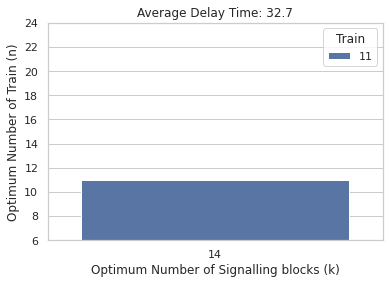

In [ ]:
sns.set(style="whitegrid")
sns.barplot( x=min_output['SigBlock'], y=min_output['Train'], hue=min_output['Train'], dodge=True)
plt.xlabel('Optimum Number of Signalling blocks (k)')
plt.ylabel('Optimum Number of Train (n)')
plt.ylim(6, 24)
plt.title('Average Delay Time: ' + str(min(output['Time'])))
plt.show()

The results obtained using the exhaustive search or brute-force search algorithm for the entire search space shows that **11 trains per hour and 14 signalling blocks** yields the least delay time of **32.7 secs**. This approach will be used as a benchmark to test and compare the Monte Carlo Tree Search algorithm.

### **Monte Carlo Method**

The **Monte Carlo Algorithm** is a class of computational algorithm that relies on repeated random sampling to obtain numerical results.

This approach will be used to select the optimal number of trains and signalling blocks between london old oak commons and birmingham interchange to minimize overall average travel time.

In [ ]:
def MonteCarlo(n, xmin, xmax, ymin, ymax):
    x = [random.randint(xmin, xmax) for i in range(n)]
    y = [random.randint(ymin, ymax) for i in range(n)]
    xmc = [x[0]]
    ymc = [y[0]]
    
    #simulate
    simulationdata = simulate_trainline(x[0],y[0])
    MCmin = processDelay(simulationdata)
    
    for i in range(1, len(x)):
        #simulate
        simulationdata = simulate_trainline(x[i],y[i])
        fresult = processDelay(simulationdata) 
        #Time constraint condition
        if fresult < ((3600/i)/2):
            xmc += [x[i]]
            ymc += [y[i]]
            MCmin = fresult
    
    #simulate
    simulationdata = simulate_trainline(xmc[-1],ymc[-1])
    simul_result = processDelay(simulationdata)
    
            
    return len(xmc), xmc[-1], ymc[-1],simul_result

The monte carlo algorithm is used to run a simulation for *100* iterations and a search space of **1, 24, 1, 16** to achieve an optimised result.

Where 1 = minimum number of trains; 24 = maximum number of trains; 1 = minimum number of signalling blocks and 16 = maximum number of signalling blocks

In [ ]:
optimum_delaytime = MonteCarlo(100,1,24,1,16)

Streaming output truncated to the last 5000 lines.
09:22:41 [Train 28] enters block 6 for trip to Birmingham Interchange
09:23:01 [Train 29] requests block 4 for trip to Birmingham Interchange
09:23:01 [Train 29] enters block 4 for trip to Birmingham Interchange
09:23:04 [Train 31] drives from depot to starting station
09:23:20 [Train 30] requests block 2 for trip to Birmingham Interchange
09:23:20 [Train 30] enters block 2 for trip to Birmingham Interchange
09:23:29 [Train 27] requests block 8 for trip to Birmingham Interchange
09:23:29 [Train 27] enters block 8 for trip to Birmingham Interchange
09:23:34 [Train 31] is waiting to depart from London Old Oak Common for Birmingham Interchange
09:23:34 [Train 31] requests block 0 for trip to Birmingham Interchange
09:23:34 [Train 31] enters block 0 for trip to Birmingham Interchange
09:24:05 [Train 25] arrives at Birmingham Interchange
09:24:05 [Train 25] has reached its final destination
09:24:51 [Train 28] requests block 7 for trip to B

In [ ]:
optimum_delaytime

(19, 13, 13, 36.83)

The **Monte Carlo method** produced an optimised result of **13 trains and 13 signalling blocks** to yield least average delay time of **36.83 seconds**.

## **Summary**

The simulation task for HS2 Train line for trains commuting from London Old Oak Commons to Birmingham Interchange was successfully carried out. Large events and random events were also induced in the simulation. The results are captured and reported accordingly.

By using two methods of optimisation, the number of trains and number of signalling blocks that could yield the least average delay time was computed and recorded. **The exhaustive search or brute-force search approach is more computationally intensive as it searches the entire search space, but it provides a better optimised result** than the Monte Carlo approach, which is less computationally intensive.

**Therefore, the recommended layout for track (k) is 14 signalling blocks and schedule (n) is 11 trains per hour to achieve a minimum delay time of 32.7 seconds**.